In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
# Datenimport
links_laser = pd.read_csv('data_new/LinkerEinzelspalt_Laser.txt', delimiter='\t')
rechts_laser = pd.read_csv('data_new/RechterEinzelspalt_Laser.txt', delimiter='\t')
doppel_laser = pd.read_csv('data_new/Doppelspalt_Laser.txt', delimiter='\t')

links_lampe = pd.read_csv('data_new/LinkerEinzelspalt_Lampe.txt', delimiter='\t')
rechts_lampe = pd.read_csv('data_new/RechterEinzelspalt_Lampe.txt', delimiter='\t')
doppel_lampe = pd.read_csv('data_new/Doppelspalt_Lampe.txt', delimiter='\t')


In [3]:
# Fitfunktionen
def single_slit_lamp(x, i_0, x_0, U, a):
    lam = 546e-9    # wavelength
    L = 0.5         # distance
    fun = np.pi * a * (x - x_0) / (lam * L)
    return i_0 * ( np.sin(fun) / fun )**2 + U


def single_slit_laser(x, i_0, x_0, U, a):
    lam = 670e-9    # wavelength
    L = 0.5         # distance
    fun = np.pi * a * (x - x_0) / (lam * L)
    return i_0 * ( np.sin(fun) / fun )**2 + U


def double_slit_lamp(x, i_0, x_0, U, a, d):
    lam = 546e-9    # wavelength
    L = 0.5         # distance
    fun = np.pi * a * (x - x_0) / (lam * L)
    double = np.cos(np.pi * d * (x - x_0) / (L * lam))
    return i_0 * double**2 * ( np.sin(fun) / fun )**2 + U


def double_slit_laser(x, i_0, x_0, U, a, d):
    lam = 670e-9    # wavelength
    L = 0.5         # distance
    fun = np.pi * a * (x - x_0) / (lam * L)
    double = np.cos(np.pi * d * (x - x_0) / (L * lam))
    return i_0 * double**2 * ( np.sin(fun) / fun )**2 + U



In [4]:
# Einheiten von mm nach m
links_laser.iloc[:, 0] *= 1e-3
rechts_laser.iloc[:, 0] *= 1e-3
links_lampe.iloc[:, 0] *= 1e-3
rechts_lampe.iloc[:, 0] *= 1e-3
doppel_lampe.iloc[:, 0] *= 1e-3
doppel_laser.iloc[:, 0] *= 1e-3


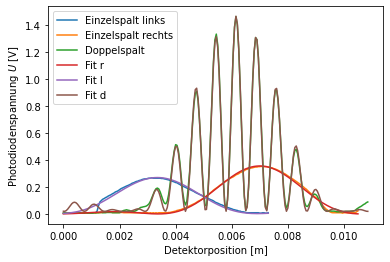

In [5]:
fig = plt.figure()
ax = plt.subplot(111)

ax.plot(links_laser.iloc[:, 0], links_laser.iloc[:, 1], label='Einzelspalt links')
ax.plot(rechts_laser.iloc[:, 0], rechts_laser.iloc[:, 1], label='Einzelspalt rechts')
ax.plot(doppel_laser.iloc[:, 0], doppel_laser.iloc[:, 1], label='Doppelspalt')
ax.set_xlabel('Detektorposition [m]')
ax.set_ylabel('Photodiodenspannung $U$ [V]')

#
fit_r, std_r = curve_fit(single_slit_laser, rechts_laser.iloc[:, 0], rechts_laser.iloc[:, 1], p0=[0.4, 7.1e-3, 0, 9.4e-5])
fit_l, std_l = curve_fit(single_slit_laser, links_laser.iloc[:, 0], links_laser.iloc[:, 1], p0=[0.5, 4.2e-3, 0, 9.4e-5])
fit_d, std_d = curve_fit(double_slit_laser, doppel_laser.iloc[:, 0], doppel_laser.iloc[:, 1], p0=[1.45, 6.2e-3, 0.01, 9.4e-5, 4.6e-4])#, maxfev=10000)

ax.plot(rechts_laser.iloc[:, 0], single_slit_laser(rechts_laser.iloc[:, 0], *fit_r), label='Fit r')
ax.plot(links_laser.iloc[:, 0], single_slit_laser(links_laser.iloc[:, 0], *fit_l), label='Fit l')
ax.plot(doppel_laser.iloc[:, 0], double_slit_laser(doppel_laser.iloc[:, 0], *fit_d), label='Fit d')
ax.legend()

fig.savefig('images/laserges.png', dpi=300)


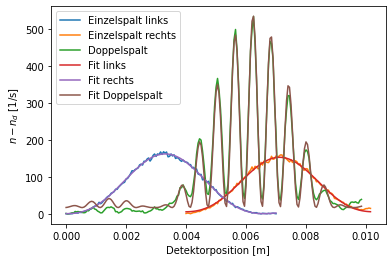

In [6]:
fig = plt.figure()
ax = plt.subplot(111)
dunkel = 42.9 / 10
ax.plot(links_lampe.iloc[:, 0], links_lampe.iloc[:, 1] - dunkel, label='Einzelspalt links')
ax.plot(rechts_lampe.iloc[:, 0], rechts_lampe.iloc[:, 1] - dunkel, label='Einzelspalt rechts')
ax.plot(doppel_lampe.iloc[:, 0], doppel_lampe.iloc[:, 1] - dunkel, label='Doppelspalt')
ax.set_xlabel('Detektorposition [m]')
ax.set_ylabel('$n - n_d$ [1/s]')

fit_l_2, std_l_2 = curve_fit(single_slit_lamp, links_lampe.iloc[:, 0], links_lampe.iloc[:, 1] - dunkel, p0=[160, 3.25e-3, 0, 9.4e-5])
fit_r_2, std_r_2 = curve_fit(single_slit_lamp, rechts_lampe.iloc[:, 0], rechts_lampe.iloc[:, 1] - dunkel, p0=[150, 7.1e-3, 10, 8.3e-5])
fit_d_2, std_d_2 = curve_fit(double_slit_lamp, doppel_lampe.iloc[:, 0], doppel_lampe.iloc[:, 1] - dunkel, p0=[500, 6.2e-3, 0, 9.4e-5, 5e-4])

ax.plot(rechts_lampe.iloc[:, 0], single_slit_lamp(rechts_lampe.iloc[:, 0], *fit_r_2), label='Fit links')
ax.plot(links_lampe.iloc[:, 0], single_slit_lamp(links_lampe.iloc[:, 0], *fit_l_2), label='Fit rechts')
ax.plot(doppel_lampe.iloc[:, 0], double_slit_lamp(doppel_lampe.iloc[:, 0], *fit_d_2), label='Fit Doppelspalt')

plt.legend()

plt.savefig('images/lampeges.png', dpi=300)